In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, PchipInterpolator, interp1d

In [39]:
def Spline(x, y, bool):
    x_filtered = [x[0]]
    y_filtered = [y[0]]

    for i in range(len(x) - 1):
        if x_filtered[i] < x[i + 1]:
            x_filtered.append(x[i + 1])
            y_filtered.append(y[i + 1])
    
    x_filtered = np.array(x_filtered)
    y_filtered = np.array(y_filtered)

    if bool is True:
        spline = PchipInterpolator(x_filtered, y_filtered)
    else:
        spline = CubicSpline(x_filtered, y_filtered)

    return spline


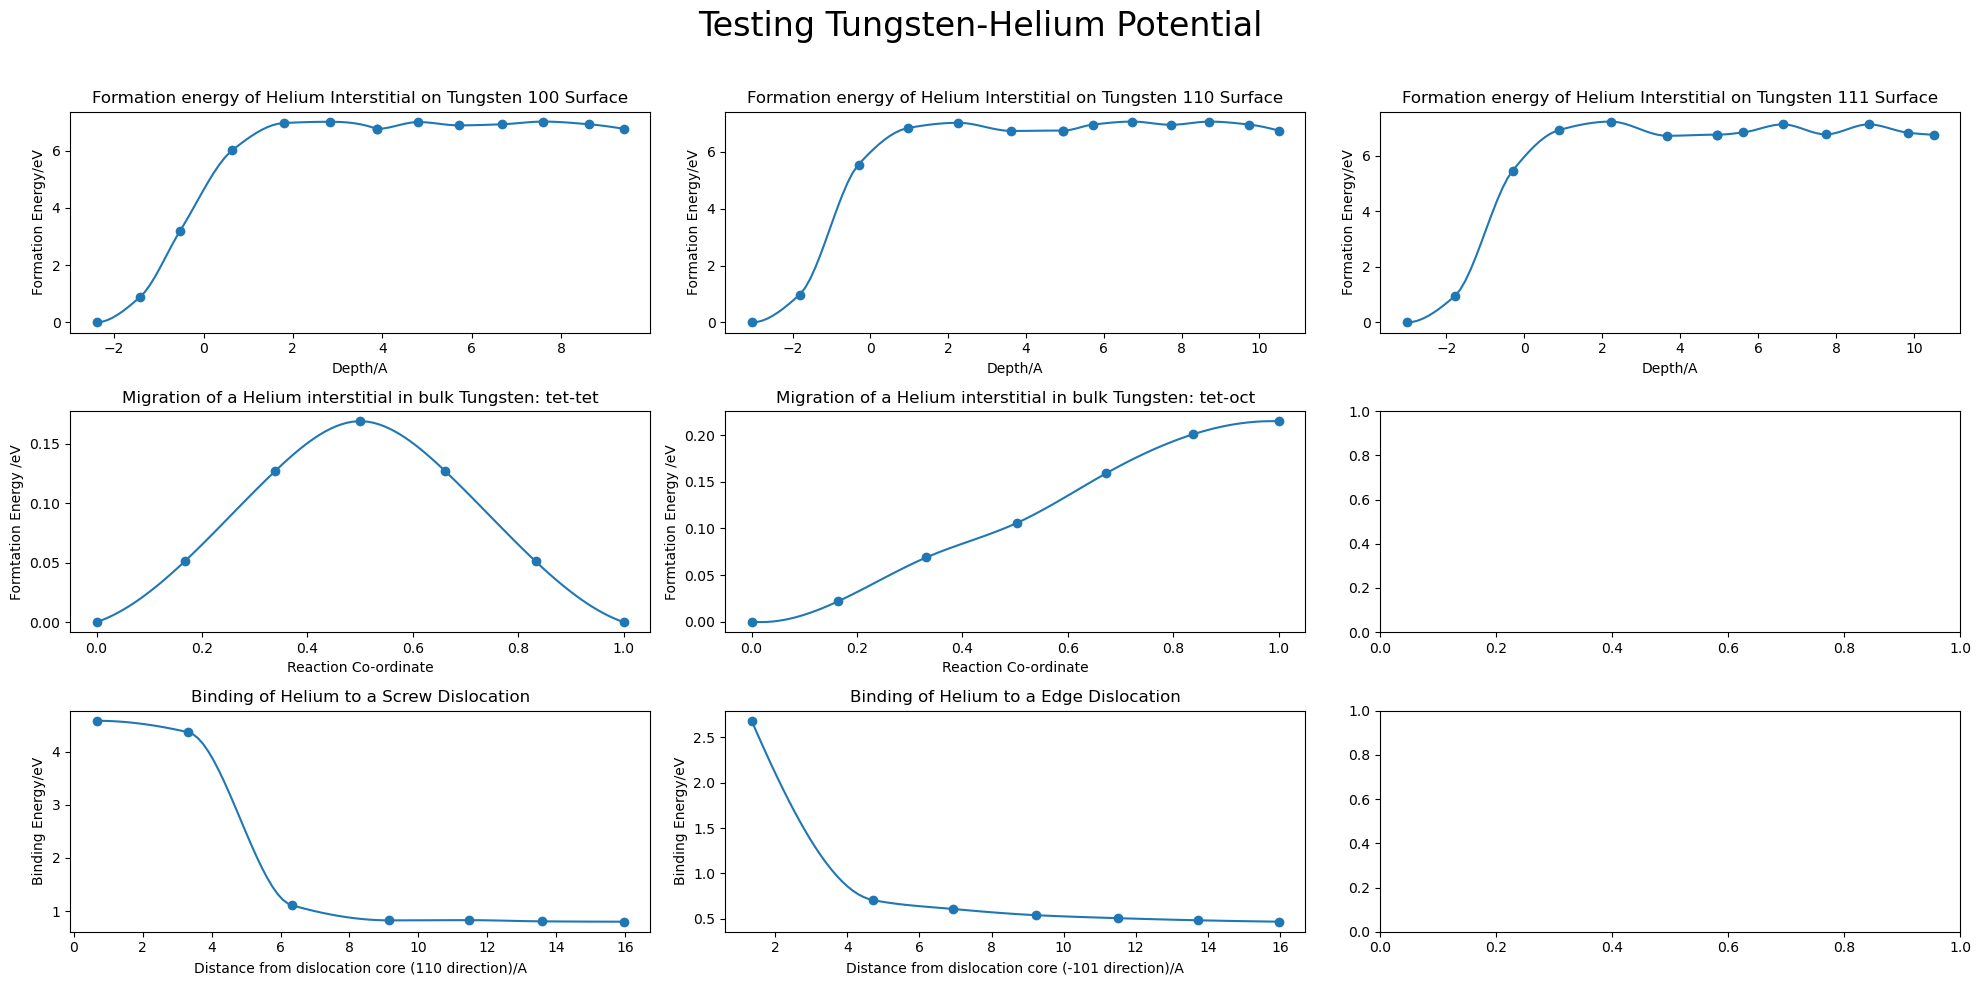

In [40]:
screw = np.loadtxt('../Test_Data/Screw_Binding.txt')
edge = np.loadtxt('../Test_Data/Edge_Binding.txt')

fig, axs = plt.subplots(3, 3, figsize=(20, 10))  

for i, orient in enumerate(['100', '110', '111']):

    lst = []
    for j in range(2):
        lst.append(np.loadtxt('../Test_Data/surface%d_%s.txt' % (j,orient)))

    data = np.vstack(lst)

    data[:,1] -= data[0,1]

    idx = np.argsort(data[:,0])
    data = data[idx]

    x = data[:,0]
    y = data[:,1]

    axs[0,i].scatter(x, y)

    pi = Spline(x, y, True)

    x_plt = np.linspace(x.min(),x.max(), 100)
    y_plt = pi(x_plt)

    axs[0,i].plot(x_plt,y_plt)
    axs[0,i].set_title('Formation energy of Helium Interstitial on Tungsten %s Surface' % orient)
    axs[0,i].set_xlabel('Depth/A')
    axs[0,i].set_ylabel('Formation Energy/eV')

data = np.loadtxt('../Test_Data/tet_tet.txt')
data[:,1] -= data[0,1]

x = data[:,0]
y = data[:,1]

cs = Spline(x, y, False)

x_plt = np.linspace(x.min(),x.max(), 100)
y_plt = cs(x_plt)

axs[1,0].scatter(x, y)
axs[1,0].plot(x_plt, y_plt)
axs[1,0].set_xlabel('Reaction Co-ordinate')
axs[1,0].set_ylabel('Formtation Energy /eV')
axs[1,0].set_title('Migration of a Helium interstitial in bulk Tungsten: tet-tet')

data = np.loadtxt('../Test_Data/tet_oct.txt')
data[:,1] -= data[0,1]

x = data[:,0]
y = data[:,1]

cs = Spline(x, y, False)

x_plt = np.linspace(x.min(),x.max(), 100)
y_plt = cs(x_plt)

axs[1,1].scatter(x, y)
axs[1,1].plot(x_plt, y_plt)
axs[1,1].set_xlabel('Reaction Co-ordinate')
axs[1,1].set_ylabel('Formtation Energy /eV')
axs[1,1].set_title('Migration of a Helium interstitial in bulk Tungsten: tet-oct')

bulk_tet = np.loadtxt('../Test_Data/Bulk_tet.txt')

x = screw[1:,0]
y = screw[1:,1] + bulk_tet

x_plt = np.linspace(x.min(), x.max(), 100)
cs = Spline(x,y, True)
y_plt = cs(x_plt)

axs[2,0].scatter(x, y)
axs[2,0].plot(x_plt, y_plt)
axs[2,0].set_title('Binding of Helium to a Screw Dislocation')
axs[2,0].set_xlabel('Distance from dislocation core (110 direction)/A')
axs[2,0].set_ylabel('Binding Energy/eV')

x = edge[1:,0]
y = edge[1:,1] + bulk_tet

x_plt = np.linspace(x.min(), x.max(), 100)
cs = Spline(x,y, True)
y_plt = cs(x_plt)

axs[2,1].scatter(x, y)
axs[2,1].plot(x_plt, y_plt)
axs[2,1].set_title('Binding of Helium to a Edge Dislocation')
axs[2,1].set_xlabel('Distance from dislocation core (-101 direction)/A')
axs[2,1].set_ylabel('Binding Energy/eV')

fig.suptitle('Testing Tungsten-Helium Potential \n', fontsize = 24)

fig.tight_layout()

